# Data Augmentation을 적용한 모델

- 최종 accuracy : 0.8467 (과적합 상태를 막기 위해 인위적으로 향상 도중 중단)
- 소요 시간 : 28s 728ms/step 

- Data Augmentation 적용 사항
  - width_shift range, height_shift range
  - horizontal_flip
  - rotation_range
  - brightness_range

  



In [0]:





%tensorflow_version 2.x
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import shutil
from keras.callbacks import EarlyStopping
from tensorflow.keras import models, datasets

from google.colab import drive
drive.mount('/content/drive')

TensorFlow 2.x selected.


Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization

### 데이터 가져오기


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import zipfile
root_dir = '/content/drive/Shared drives/scsa_2019_a/Project/dataset.zip'

zip_ref = zipfile.ZipFile(root_dir, 'r')
zip_ref.extractall("/tmp")
zip_ref.close()


In [0]:
import random

###테스트 데이터와 트레이닝 데이터 분리

In [0]:
# !rmdir -f /tmp/tmpwpnw1k1r
data_path = '/tmp/dataset_final'

In [0]:
data_dir = pathlib.Path(data_path)

tf.io.gfile.mkdir('/test2/')
test_dir = pathlib.Path('/test2/')
image_count = len(list(data_dir.glob('*/*')))
image_count
sep_test = True
print(image_count)

7399


In [0]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != '└asdfsafdsafsaafsd'])
CLASS_NAMES
print(CLASS_NAMES)

['hoona' 'yoonho' 'hyori' 'jisung' 'bts' 'iu' 'mingi' 'woosung' 'youngae'
 'twice' 'sodam' 'jaeseuk' 'jyp' 'goeun' 'joon' 'yuna']


!cp 

랜덤한 숫자 뽑기

In [0]:
if sep_test:
  for name in CLASS_NAMES:
    files = list(data_dir.glob(name + '/*'))
    randList = list(range(0, len(list(data_dir.glob(name + '/*')))))

    randList = random.sample(randList, int(len(list(data_dir.glob(name + '/*'))) * 0.2))
    print('/test2/' + name)
    tf.io.gfile.mkdir('/test2/' + name)
    print(randList)
    print(type(str(test_dir)))
    for n in randList:
      filedir = str(files[n])
      #print(name)
      
      print(str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])  

      shutil.move(filedir, str(test_dir) + '/' + name + '/' + filedir.split('/')[-1])


/test2/hoona
[62, 41, 99, 78, 38, 83, 66, 63, 18, 136, 126, 134, 65, 21, 132, 128, 43, 73, 25, 53, 124, 94, 19, 146, 140, 32, 155, 26, 101, 86, 36]
<class 'str'>
/test2/hoona/hoona (51).jpg
/test2/hoona/hoona (62).jpg
/test2/hoona/hoona (57).jpg
/test2/hoona/hoona (97).jpg
/test2/hoona/hoona (40).jpg
/test2/hoona/hoona (41).jpg
/test2/hoona/hoona (28).jpg
/test2/hoona/hoona (60).jpg
/test2/hoona/hoona (90).jpg
/test2/hoona/hoona (153).jpg
/test2/hoona/hoona (155).jpg
/test2/hoona/hoona (49).jpg
/test2/hoona/hoona (85).jpg
/test2/hoona/hoona (36).jpg
/test2/hoona/hoona (19).jpg
/test2/hoona/hoona (7).jpg
/test2/hoona/hoona (33).jpg
/test2/hoona/hoona (73).jpg
/test2/hoona/hoona (20).jpg
/test2/hoona/hoona (117).jpg
/test2/hoona/hoona (44).jpg
/test2/hoona/hoona (91).jpg
/test2/hoona/hoona (82).jpg
/test2/hoona/hoona (8).jpg
/test2/hoona/hoona (132).jpg
/test2/hoona/hoona (100).jpg
/test2/hoona/hoona (149).JPG
/test2/hoona/hoona (61).jpg
/test2/hoona/hoona (135).jpg
/test2/hoona/hoona (5

In [0]:
!ls /test2

bts    hoona  iu       jisung  jyp    sodam  woosung  youngae
goeun  hyori  jaeseuk  joon    mingi  twice  yoonho   yuna


## 수직 수평 밝기 조정

10/10 [==============================] - 2s 153ms/step - loss: 0.9321 - acc: 0.7411

## 수직 수평 회전
loss: 0.8101 - acc: 0.7585

### image generator 만들기 
- Data Augmentation 적용 사항
  - width_shift range, height_shift range
  - horizontal_flip
  - rotation_range
  - brightness_range

In [0]:

# image generator for unziped directory 
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = (
    tf.keras.preprocessing.image.ImageDataGenerator(
        width_shift_range=0.01,
        height_shift_range=0.01,
        horizontal_flip=True, 
        #vertical_flip=True,
        rotation_range=15,
        brightness_range=[0.8,1.2],
        #zoom_range=0.01,
        validation_split=0.2,
        rescale=1./255))



image_generator_cwd = (
    tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)) # preprocessing이라는 모듈 밑에 이미지를 처리하는 애들이 있고, 그 안에 있음.

In [0]:
# !cp -r /content/drive/"Shared drives"/scsa_2019_a/Project/dataset /content/sample_data

In [0]:
BATCH_SIZE = 128
IMG_HEIGHT = 128
IMG_WIDTH = 128
#STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='training'
                      )

test_data_gen = image_generator.flow_from_directory(
                      directory=str(data_dir),
                      batch_size=BATCH_SIZE,
                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                      classes = list(CLASS_NAMES),
                      subset='validation'
                      )
final_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=26,
                        shuffle=True,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )


Found 4747 images belonging to 16 classes.
Found 1178 images belonging to 16 classes.
Found 1474 images belonging to 16 classes.


In [0]:
# print(class_list)

Early Stopping Preperation

In [0]:
epochs_to_wait_for_improve = 10
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=epochs_to_wait_for_improve)

In [0]:
def model_cnn_basic():
  model = models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
  model.add(Conv2D(64,3,padding='same',activation='relu'))

  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
  
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))

  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 4
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  #model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # conv 4
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  model.add(Conv2D(64, 3, padding='same', activation='relu'))
  #model.add(Conv2D(256, 3, padding='same', activation='relu'))
  #model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))

  # Dense layers
  model.add(Flatten(name='flatten'))
  #model.add(Dense(1024, activation='relu', name='dense_1024'))
  model.add(Dense( len(list(CLASS_NAMES)), activation='softmax', name='dense_10'))

  return model

model_basic = model_cnn_basic()
model_basic.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 128, 128, 64)      1792      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 63, 63, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 63, 63, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 31, 31, 256)      

In [0]:
model_basic.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
epoch_n = 200

In [0]:
history_basic = model_basic.fit_generator(train_data_gen, 
                        epochs=epoch_n,
                        callbacks=[early_stopping_callback],
                        validation_data=test_data_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 10 steps
Epoch 1/200
38/38 [==============================] - 28s 743ms/step - loss: 2.6561 - acc: 0.1091 - val_loss: 2.5788 - val_acc: 0.1197
Epoch 2/200
38/38 [==============================] - 28s 740ms/step - loss: 2.4657 - acc: 0.1864 - val_loss: 2.2075 - val_acc: 0.2411
Epoch 3/200
38/38 [==============================] - 28s 725ms/step - loss: 2.1239 - acc: 0.3055 - val_loss: 1.9814 - val_acc: 0.3489
Epoch 4/200
38/38 [==============================] - 28s 732ms/step - loss: 1.8575 - acc: 0.3845 - val_loss: 1.8051 - val_acc: 0.3896
Epoch 5/200
38/38 [==============================] - 28s 730ms/step - loss: 1.5987 - acc: 0.4767 - val_loss: 1.5291 - val_acc: 0.4941
Epoch 6/200
38/38 [==============================] - 28s 728ms/step - loss: 1.4100 - acc: 0.5372 - val_loss: 1.3000 - val_acc: 0.5815
Epoch 7/200
38/38 [==============================] - 28s 727ms/step - loss: 1.1952 - acc: 0.6103 - val_l

## Evaluate

In [0]:
model_basic.evaluate_generator(final_gen, verbose=2)

  ...
    to  
  ['...']
57/57 - 1s - loss: 0.7028 - acc: 0.8467


[0.7027538663037775, 0.8466757]

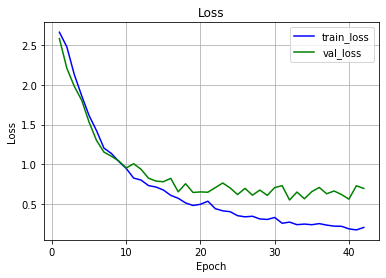

In [0]:
loss = history_basic.history['loss']
epochs = range(1, len(loss)+1)

plt.title('Loss')
plt.plot(epochs, history_basic.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history_basic.history['val_loss'], 'g', label='val_loss')
#plt.ylim([0,0.5])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [0]:
test_accuracy = model_basic.evaluate_generator(test_data_gen, verbose=1)

  ...
    to  
  ['...']
10/10 [==============================] - 5s 526ms/step - loss: 0.6676 - acc: 0.8447


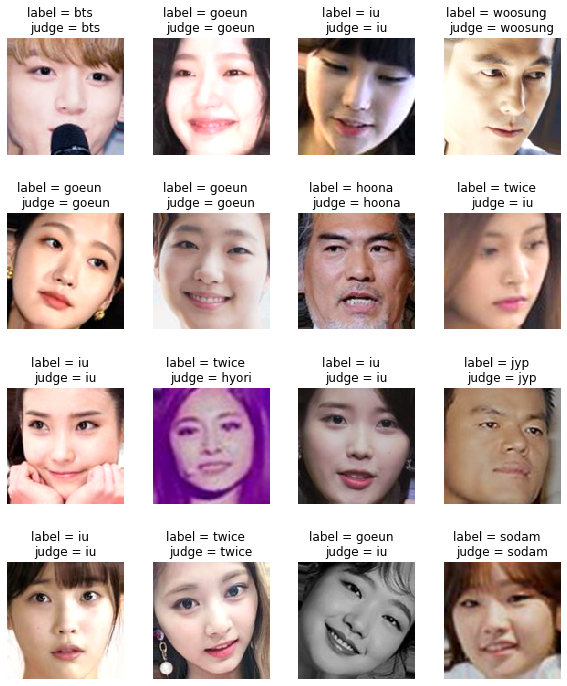

In [0]:
def show_batch(data_gen, class_l):
  # get image and label from data generator
  img_batch, l_batch = next(data_gen) 
  plt.figure(figsize=(10,10))
  ret = []
  img_title = model_basic.predict(img_batch)
  for img in img_title:
    ret.append(np.array(img).argmax())
  for n in range(16):
    ax = plt.subplot(4,4,n+1)
    plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
    plt.imshow(img_batch[n])
    title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
    plt.title(title_name)
    plt.axis('off')

show_batch(test_data_gen, CLASS_NAMES)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
test_data_gen = image_generator_cwd.flow_from_directory(
                        directory=str(test_dir),
                        batch_size=BATCH_SIZE,
                        shuffle=False,
                        target_size=(IMG_HEIGHT, IMG_WIDTH), # target_size : 이미지들의 사이즈를 조작
                        classes = list(CLASS_NAMES)
                        )

Y_pred = model_basic.predict_generator(test_data_gen, 2210 // BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))

Found 1474 images belonging to 16 classes.
Confusion Matrix
[[ 30   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  3  35   0   0   2   1   4   2   0   0   0   0   0   1   0   0]
 [  0   1  54   0   0   6   2   0   2   2   1   2   0   2   0   3]
 [  0   1   0  25   0   0   1   0   0   0   0   0   0   1   0   0]
 [  1   7   1   1  99   3   9   2   0   1   2   1   0   0   0   1]
 [  0   0   4   1   6 154   2   0   2   4   1   0   0   3   0   0]
 [  1   0   0   0   0   2 110   0   0   0   0   0   0   0   0   0]
 [  1   3   0   0   0   0   4  74   0   0   0   3   0   1   0   0]
 [  1   1   3   0   0   5   1   1  22   2   0   0   0   1   0   1]
 [  1   0   6   0   2   6   3   0   2 141   0   0   1   1   0   2]
 [  1   0   0   1   1   1   1   1   0   0 111   1   0  13   1   0]
 [  1   0   0   0   0   0   0   1   0   0   0 101   0   0   0   0]
 [  6   1   2   1   0   0   2   2   0   0   0   0  40   0   0   0]
 [  0   0   1   2   1   2   2   0   2   1   8   1   0 155   0   2]
 [

In [0]:
CLASS_NAMES

array(['hoona', 'yoonho', 'hyori', 'jisung', 'bts', 'iu', 'mingi',
       'woosung', 'youngae', 'twice', 'sodam', 'jaeseuk', 'jyp', 'goeun',
       'joon', 'yuna'], dtype='<U7')

In [0]:
print('Classification Report')
print(classification_report(test_data_gen.classes, y_pred, target_names=CLASS_NAMES))

Classification Report
              precision    recall  f1-score   support

       hoona       0.59      0.97      0.73        31
      yoonho       0.69      0.73      0.71        48
       hyori       0.75      0.72      0.73        75
      jisung       0.78      0.89      0.83        28
         bts       0.89      0.77      0.83       128
          iu       0.84      0.87      0.85       177
       mingi       0.77      0.97      0.86       113
     woosung       0.88      0.86      0.87        86
     youngae       0.73      0.58      0.65        38
       twice       0.93      0.85      0.89       165
       sodam       0.90      0.84      0.87       132
     jaeseuk       0.92      0.98      0.95       103
         jyp       0.93      0.74      0.82        54
       goeun       0.85      0.88      0.86       177
        joon       0.96      0.77      0.86        31
        yuna       0.89      0.83      0.86        88

    accuracy                           0.85      1474
   m

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2
3
4
5
6
7
8
9
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10
11
12
13
14
15
16
17
18
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19
20
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
21
22
23
24
25
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
26
27
28
29
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
30
31
32
33
34
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
35
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
36


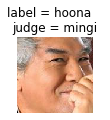

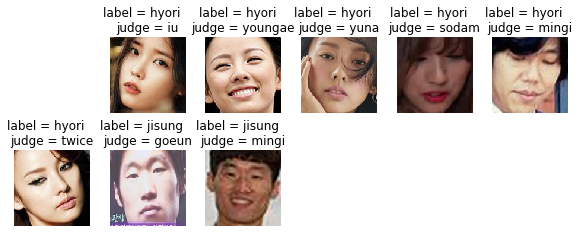

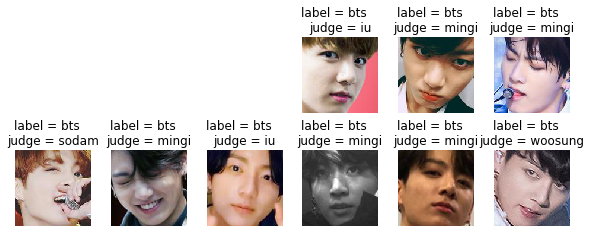

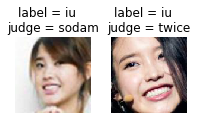

<Figure size 720x720 with 0 Axes>

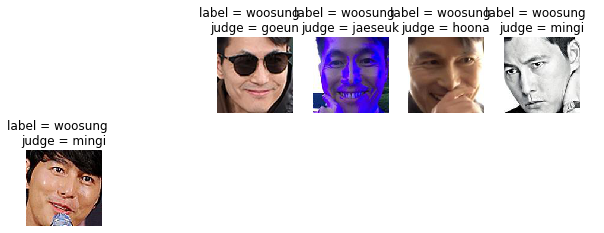

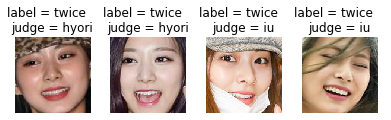

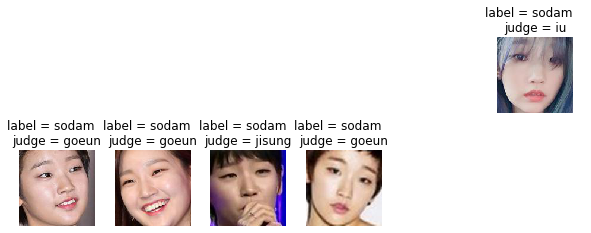

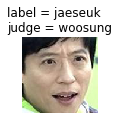

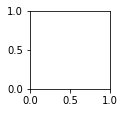

In [0]:
def show_batch_wrong(data_gen, class_l):
  # get image and label from data generator
  i = 1
  for img_batch, l_batch in data_gen:
    if i > 36: break
    plt.figure(figsize=(10,10))
    ret = []
    img_title = model_basic.predict(img_batch)
    print(l_batch[1])
    #if l_batch[n]==1][0] != 'hyori': continue
    for img in img_title:
      ret.append(np.array(img).argmax())
  
    for n in range(36):
      if class_l[l_batch[n]==1][0] == CLASS_NAMES[ret[n]]: continue
      plt.subplot(6, 6, i)
      print(i)
      i+=1
      if i > 36: break
      plt.subplots_adjust(top = 0.9, bottom=0.01, hspace=0.5, wspace=0.2)
      plt.imshow(img_batch[n])
      title_name = 'label = ' + class_l[l_batch[n]==1][0] + "   \n" + "judge = " + CLASS_NAMES[ret[n]]
      plt.title(title_name)
      plt.axis('off')

show_batch_wrong(test_data_gen, CLASS_NAMES)